In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

digits = load_digits()
X = digits.data
y = digits.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [6, 7, 8, 9]}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
knn_accuracy = accuracy_score(y_test, best_knn.predict(X_test))


log_reg = LogisticRegression(max_iter=100, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test))

dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
dt_accuracy = accuracy_score(y_test, best_dt.predict(X_test))

rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
rf_accuracy = accuracy_score(y_test, best_rf.predict(X_test))

print("Model Accuracies:")
print(f"KNN (k={grid_knn.best_params_['n_neighbors']}): {knn_accuracy:.4f}")
print(f"Logistic Regression: {log_reg_accuracy:.4f}")
print(f"Decision Tree: {dt_accuracy:.4f}")
print(f"Random Forest: {rf_accuracy:.4f}")

Model Accuracies:
KNN (k=7): 0.9722
Logistic Regression: 0.9722
Decision Tree: 0.8417
Random Forest: 0.9806


Logistic Regression Accuracy:  0.9704
Random Forest Accuracy:  0.9778
Decision Tree Accuracy:  0.8407


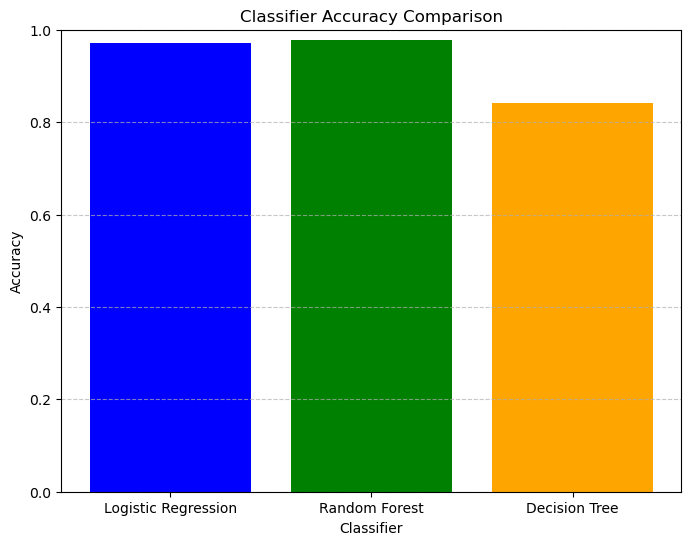

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy= accuracy_score(y_test, model.predict(X_test))
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy: 0.4f}")

plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlabel("Classifier")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

--- Logistic Regression ---


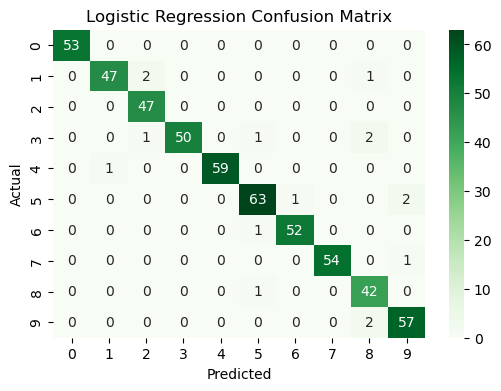

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.94      0.96        50
           2       0.94      1.00      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      0.98      0.99        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.89      0.98      0.93        43
           9       0.95      0.97      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

--- Random Forest ---


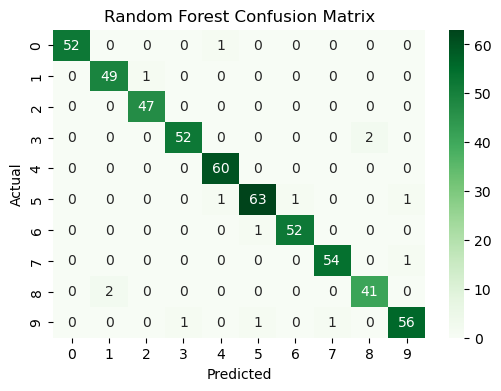

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      0.98      0.97        50
           2       0.98      1.00      0.99        47
           3       0.98      0.96      0.97        54
           4       0.97      1.00      0.98        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

--- Decision Tree ---


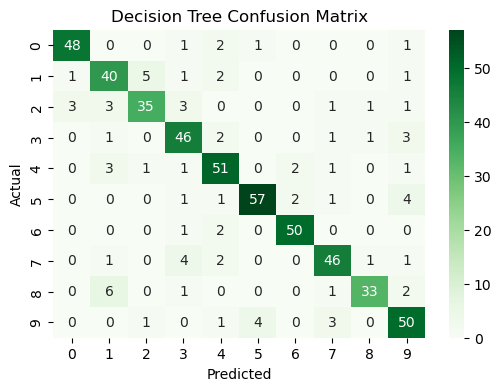

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.74      0.80      0.77        50
           2       0.83      0.74      0.79        47
           3       0.78      0.85      0.81        54
           4       0.81      0.85      0.83        60
           5       0.92      0.86      0.89        66
           6       0.93      0.94      0.93        53
           7       0.85      0.84      0.84        55
           8       0.92      0.77      0.84        43
           9       0.78      0.85      0.81        59

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540


Evaluation Metrics Table:
                 Model  F1 Score  Precision    Recall  \
0  Logistic Regression  0.970508   0.971507  0.970370   
1        Random Forest  0.974032   0.974149  0.974074   
2        Decision Tr

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = pd.DataFrame(columns=["Model", "F1 Score", "Precision", "Recall", "Confusion Matrix"])

for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)

    results = pd.concat([results,
                         pd.DataFrame({"Model": [name],
                                       "F1 Score": [f1],
                                       "Precision": [precision],
                                       "Recall": [recall],
                                       "Confusion Matrix": [cm]})],
                        ignore_index=True)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=range(10), yticklabels=range(10))
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

print("\nEvaluation Metrics Table:")
print(results)